In [1]:
#  Problem to solve
#  -----------------
#  The goal of this project is to define a location for a wine bar in the city of Madrid.
# First Step: We will use the data from the city of Madrid to find the best location for the bar, for this , we have to scrape  the neighborhoods of the city of Madrid.

In [2]:
#!pip install geopy
from geopy.geocoders import Nominatim
#!pip install folium

In [3]:
#  Import libraries
#  ----------------
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# for converting an address into latitude and longitude values
from geopy.geocoders import Nominatim

import folium
import folium.plugins as plugins

In [4]:


# for finding geographical coordinates
#!pip install geopy
import geocoder

# for converting an address into latitude and longitude values
from geopy.geocoders import Nominatim

# for rending maps
import folium

# for removing Spanish accents from map labels in Folium (encoding incompatibility)
import unicodedata

# for clustering neighbourhoods
from sklearn.cluster import KMeans

# for drawing the elbow method and scatterplot
import matplotlib.pyplot as plt

# for displaying map of clusters
import matplotlib.cm as cm
import matplotlib.colors as colors

# for displaying the scatterplot of household income vs people per market
import seaborn as sns

# for arranging labels around the scatterplot to avoid overlapping neighbourhood names
from adjustText import adjust_text

In [5]:
# Scrapping wikipedia in order to get the neighborhoods of the city of Madrid
# ---------------------------------------------------------------------------
url = "https://en.wikipedia.org/wiki/List_of_neighborhoods_of_Madrid"
r = requests.get(url)

In [6]:
r # right now we have the html code of the page, 200 = ok

<Response [200]>

In [7]:
soup = BeautifulSoup(r.content, 'html.parser')

In [8]:
soup.title.text # we have the title of the page

'List of neighborhoods of Madrid - Wikipedia'

In [9]:
# The following code will get the table with the neighborhoods of the city of Madrid
table = soup.find('table', {'class': 'wikitable sortable'})

In [10]:
table # we have the table with the neighborhoods of the city of Madrid

<table class="wikitable sortable">
<tbody><tr>
<th>District name (number)
</th>
<th>District location
</th>
<th>Number
</th>
<th>Name
</th>
<th>Image
</th></tr>
<tr>
<td rowspan="6"><a href="/wiki/Centro_(Madrid)" title="Centro (Madrid)">Centro</a> (1)
</td>
<td rowspan="6"><br/><a class="image" href="/wiki/File:Centro_District_loc-map.svg"><img alt="Centro District loc-map.svg" data-file-height="527" data-file-width="527" decoding="async" height="200" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Centro_District_loc-map.svg/200px-Centro_District_loc-map.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Centro_District_loc-map.svg/300px-Centro_District_loc-map.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/09/Centro_District_loc-map.svg/400px-Centro_District_loc-map.svg.png 2x" width="200"/></a>
</td>
<td align="center">11
</td>
<td align="center"><a href="/wiki/Palacio_(Madrid)" title="Palacio (Madrid)">Palacio</a>
</td>
<td align="center"

In [11]:
# Finding the tr tags in the table ( just the header)
trs = table.find_all('tr')[0]

In [12]:
trs # we have the header of the table

<tr>
<th>District name (number)
</th>
<th>District location
</th>
<th>Number
</th>
<th>Name
</th>
<th>Image
</th></tr>

In [13]:
# Finding the th tags in the header
ths = trs.find_all('th')

In [14]:
print(ths) # we have the header of the table

[<th>District name (number)
</th>, <th>District location
</th>, <th>Number
</th>, <th>Name
</th>, <th>Image
</th>]


In [15]:
# Placeholder for list of neighbourhoods
neighbourhoods = []

# Iterate through the rows of the table
# Note: each district has sub-rows of neighbourhoods
for row in table.findAll("tr"):
    cells = row.findAll('td')

    # Parse 1st neighbourhood of the district
    if len(cells)==5:
        neighbourhoods.append(cells[3].find(text=True).replace('\n', '').rstrip().lstrip().upper())

    # Parse sub-rows (rest of neighbourhoods of the district)
    elif len(cells)==3:
        neighbourhoods.append(cells[1].find(text=True).replace('\n', '').rstrip().lstrip().upper())

print(f'Number of neighbourhoods: {len(neighbourhoods)}')

Number of neighbourhoods: 131


In [16]:
neighbourhoods # we have the list of the neighborhoods of the city of Madrid

['PALACIO',
 'EMBAJADORES',
 'CORTES',
 'JUSTICIA',
 'UNIVERSIDAD',
 'SOL',
 'IMPERIAL',
 'ACACIAS',
 'CHOPERA',
 'LEGAZPI',
 'DELICIAS',
 'PALOS DE MOGUER',
 'ATOCHA',
 'PACÍFICO',
 'ADELFAS',
 'ESTRELLA',
 'IBIZA',
 'LOS JERÓNIMOS',
 'NIÑO JESÚS',
 'RECOLETOS',
 'GOYA',
 'FUENTE DEL BERRO',
 'GUINDALERA',
 'LISTA',
 'CASTELLANA',
 'EL VISO',
 'PROSPERIDAD',
 'CIUDAD JARDÍN',
 'HISPANOAMÉRICA',
 'NUEVA ESPAÑA',
 'CASTILLA',
 'BELLAS VISTAS',
 'CUATRO CAMINOS',
 'CASTILLEJOS',
 'ALMENARA',
 'VALDEACEDERAS',
 'BERRUGUETE',
 'GAZTAMBIDE',
 'ARAPILES',
 'TRAFALGAR',
 'ALMAGRO',
 'RÍOS ROSAS',
 'VALLEHERMOSO',
 'EL PARDO',
 'FUENTELARREINA',
 'PEÑAGRANDE',
 'PILAR',
 'LA PAZ',
 'VALVERDE',
 'MIRASIERRA',
 'EL GOLOSO',
 'CASA DE CAMPO',
 'ARGÜELLES',
 'CIUDAD UNIVERSITARIA',
 'VALDEZARZA',
 'VALDEMARÍN',
 'EL PLANTÍO',
 'ARAVACA',
 'LOS CÁRMENES',
 'PUERTA DEL ÁNGEL',
 'LUCERO',
 'ALUCHE',
 'CAMPAMENTO',
 'CUATRO VIENTOS',
 'LAS ÁGUILAS',
 'COMILLAS',
 'OPAÑEL',
 'SAN ISIDRO',
 'VISTA ALEGR

In [17]:
# Creating a dataframe with the neighborhoods of the city of Madrid
# ---------------------------------------------------------------------------
neighbourhoods_df = pd.DataFrame(neighbourhoods, columns=['Neighbourhood'])

In [18]:
neighbourhoods_df # we have the dataframe with the neighborhoods of the city of Madrid

,Neighbourhood
0,PALACIO
1,EMBAJADORES
2,CORTES
3,JUSTICIA
4,UNIVERSIDAD
...,...
126,ALAMEDA DE OSUNA
127,AEROPUERTO
128,CASCO HISTÓRICO DE BARAJAS
129,TIMÓN


In [19]:
# Geocoder fails to locate some of the neighbourhoods correctly and therefore it is necessary
# to request the coordinates using a different name for these particular areas.
def rename(neighbourhood):
    new_name = neighbourhood
    if new_name == 'CASCO HISTÓRICO DE VICÁLVARO':
        new_name = 'VICÁLVARO'
    elif new_name == 'QUINTANA':
        new_name = 'PARQUE DE CALERO'
    elif new_name == 'BUTARQUE':
        new_name = 'VILLAVERDE BAJO'
    return new_name

# Function that retrieves the geographical coordinates for a given neighborhood
def get_coordinates(row):
    # initialize variable to None
    lat_lng_coords = None

    # loop until we get the coordinates
    while lat_lng_coords is None:
      g = geocoder.arcgis(f'{rename(row["Neighbourhood"])}, Madrid')
      lat_lng_coords = g.latlng

    # return pair lat,long
    return pd.Series([lat_lng_coords[0], lat_lng_coords[1]])

In [20]:
neighbourhoods_df[['Latitude', 'Longitude']] = neighbourhoods_df.apply(get_coordinates, axis=1)

In [21]:
neighbourhoods_df.head() # we have the dataframe with the neighborhoods of the city of Madrid and their coordinates

,Neighbourhood,Latitude,Longitude
0,PALACIO,40.41517,-3.71273
1,EMBAJADORES,40.40803,-3.70067
2,CORTES,40.41589,-3.69636
3,JUSTICIA,40.42479,-3.69308
4,UNIVERSIDAD,40.42565,-3.70726


In [22]:
neighbourhoods_df.shape

(131, 3)

In [23]:
#neighbourhoods_df.to_csv('neighbourhoods_df.csv', index=False)

In [24]:
# Checking null values in the dataframe
# ---------------------------------------------------------------------------

In [25]:
neighbourhoods_df.isnull().sum() # we have the number of null values in the dataframe

Neighbourhood    0
Latitude         0
Longitude        0
dtype: int64

In [26]:
# Visualizing the dataframe
# ---------------------------------------------------------------------------

In [27]:
address = 'Madrid, Spain'
geolocator = Nominatim(user_agent="madrid_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f'The geograpical coordinates of Madrid are {latitude}, {longitude}')

The geograpical coordinates of Madrid are 40.4167047, -3.7035825


In [28]:
cambio_barrio = {'CHOPERA':'LA CHOPERA', 'CONCEPCIÓN':'LA CONCEPCIÓN', 'ESTRELLA': 'LA ESTRELLA', 'PILAR':'EL PILAR', 'VILLAVERDE ALTO':'VILLAVERDE ALTO, C.H'}

In [29]:
for i in neighbourhoods_df['Neighbourhood']:
    if i in cambio_barrio:
        neighbourhoods_df.loc[neighbourhoods_df['Neighbourhood'] == i, 'Neighbourhood'] = cambio_barrio[i]

In [30]:
# Creating a map of the city of Madrid
# ---------------------------------------------------------------------------

In [31]:
# Creating the map
#map = folium.Map(
   # location=[latitude, longitude],
   # zoom_start=12,
    #tiles='Stamen Terrain'
#)

In [32]:
# Adding the markers to the map
# ---------------------------------------------------------------------------

In [33]:
#for index, row in neighbourhoods_df.iterrows():
   # folium.Marker(
       # location=[row['Latitude'], row['Longitude']],
        #popup=row['Neighbourhood'],
       # icon=folium.Icon(color='red')
  #  ).add_to(map)


In [34]:
# Saving the map
# ---------------------------------------------------------------------------

In [35]:
#map.save('madrid_map.html')

In [36]:
#map

In [37]:
# Spanish accents are not correctly rendered in Folium
# to remove them for a better understanding of the map
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode("utf-8")

In [38]:
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster

from folium import Icon

# create map of Madrid using latitude and longitude values
map_madrid = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(neighbourhoods_df['Latitude'], neighbourhoods_df['Longitude'], neighbourhoods_df['Neighbourhood']):
    label = folium.Popup(remove_accents(label), parse_html=True)

    icono = Icon(color = "green",
                     prefix="fa",
                     icon="glass",
                     icon_color="black")
    map_madrid = folium.Marker(
        location=[lat, lng],
        popup=label,
        icon=icono
    ).add_to(map_madrid)
map_madrid

In [41]:
# Establishing a connection to foursquare API
# ---------------------------------------------------------------------------

In [40]:
tok1 = "RRLQJ3E2XUVOIOJ1JCCTVG5T2TW5EUVL35NBIEAJGO5UHUH2"
tok2 = "IZUZ45XFYXTK0NNIBHIF412VCEOZGOMSLUN5CWOT50IERA5S"

In [41]:
#find_places('wine', latitude, longitude)

In [42]:
# Function to find venues in a given neighbourhood
def getnearbyvenues (names, latitudes, longitudes, radius=500):

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?' + \
            '&client_id={}'.format(tok1) + \
            '&client_secret={}'.format(tok2) + \
            '&v=20180323' + \
            '&ll={},{}'.format(lat, lng) + \
            '&radius={}'.format(radius)+\
            '&limit=100'


        # make the GET request
        results = requests.get(url).json()["response"]['venues']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['name'],
            v['location']['lat'],
            v['location']['lng'],
            v['categories'][0]['name']) for v in results if v['categories']])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood',
                  'Neighbourhood Latitude',
                  'Neighbourhood Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']

    return nearby_venues

In [43]:
# Search for venues within 1Km of radius from the neighbourhood centre point
radius = 1000

madrid_venues = getnearbyvenues(names=neighbourhoods_df['Neighbourhood'],
                                   latitudes=neighbourhoods_df['Latitude'],
                                   longitudes=neighbourhoods_df['Longitude'],
                                   radius=radius)

print(madrid_venues.shape)
madrid_venues.head(175)

(6047, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PALACIO,40.41517,-3.71273,Instituto Italiano de Cultura,40.415197,-3.712883,General College & University
1,PALACIO,40.41517,-3.71273,Cervecería La Mayor,40.415218,-3.712194,Beer Bar
2,PALACIO,40.41517,-3.71273,Consejo De Estado,40.415129,-3.713384,Government Building
3,PALACIO,40.41517,-3.71273,Iglesia del Sacramento,40.415070,-3.712244,Church
4,PALACIO,40.41517,-3.71273,Santa Iglesia Catedral de Santa María la Real ...,40.415767,-3.714516,Church
...,...,...,...,...,...,...,...
170,JUSTICIA,40.42479,-3.69308,Green House Restaurant,40.425169,-3.692314,Restaurant
171,JUSTICIA,40.42479,-3.69308,Parking Publico Villa de Paris,40.425103,-3.693528,Parking
172,JUSTICIA,40.42479,-3.69308,RGA Re,40.425369,-3.692637,Office
173,JUSTICIA,40.42479,-3.69308,Below Group,40.425502,-3.693504,Office


In [44]:
#---------------------------------------------------------------------------

In [45]:
# Clustering the venues in the neighbourhood
# ---------------------------------------------------------------------------

In [46]:
# applying one hot encoding to the category column
madrid_venues_categ = pd.get_dummies(madrid_venues['Venue Category'])
# adding the neightbourhood column back to the dataframe
madrid_venues_categ['Neighbourhood'] = madrid_venues['Neighbourhood']

In [47]:
madrid_venues_categ.head()

,Accessories Store,Adult Boutique,Adult Education Center,Advertising Agency,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PALACIO
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PALACIO
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PALACIO
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PALACIO
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PALACIO


In [48]:
# Grouping the venues by neighbourhood
madrid_venues_grouped = madrid_venues_categ.groupby('Neighbourhood').mean().reset_index()
madrid_venues_grouped.head(25)

,Neighbourhood,Accessories Store,Adult Boutique,Adult Education Center,Advertising Agency,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,...,Warehouse,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,ABRANTES,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00
1,ACACIAS,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.021739,0.0,0.000000,0.0,0.00,0.00
2,ADELFAS,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00
3,AEROPUERTO,0.000000,0.0,0.0,0.000000,0.0,0.02,0.640000,0.02,0.06,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00
4,ALAMEDA DE OSUNA,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.021739,0.000000,0.0,0.000000,0.0,0.00,0.00
5,ALMAGRO,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00
6,ALMENARA,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00
7,ALMENDRALES,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00
8,ALUCHE,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00
9,AMPOSTA,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00


In [49]:
#madrid_venues_grouped = madrid_venues_categ['Airport'].sum()
madrid_venues_grouped.sum(axis=1)

C:\Users\PLATER~1\AppData\Local\Temp/ipykernel_20432/1602861246.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  madrid_venues_grouped.sum(axis=1)


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
126    1.0
127    1.0
128    1.0
129    1.0
130    1.0
Length: 131, dtype: float64

In [50]:
#Print each district along with top 5 most common venues
num_top_venues = 5

for hood in madrid_venues_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = madrid_venues_grouped[madrid_venues_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----ABRANTES----
              venue  freq
0               Bar  0.07
1  Dentist's Office  0.07
2      Tech Startup  0.04
3              Park  0.04
4            Bakery  0.04


----ACACIAS----
                          venue  freq
0                          Park  0.09
1                   Pizza Place  0.07
2              Tapas Restaurant  0.04
3                          Café  0.04
4  General College & University  0.04


----ADELFAS----
           venue  freq
0           Bank  0.08
1            Bar  0.06
2  Metro Station  0.04
3         Bakery  0.04
4         Office  0.04


----AEROPUERTO----
             venue  freq
0     Airport Gate  0.64
1  Airport Service  0.06
2     Optical Shop  0.04
3  Coworking Space  0.04
4         Building  0.02


----ALAMEDA DE OSUNA----
           venue  freq
0  Travel Agency  0.20
1            Bar  0.07
2      Bookstore  0.07
3           Bank  0.04
4  Grocery Store  0.04


----ALMAGRO----
                venue  freq
0            Building  0.09
1              

### External data loading and cleaning

In [51]:
#---------------------------------------------------------------------------

In [52]:
# Loading the data
# ---------------------------------------------------------------------------

In [53]:
# Load the data
df_madrid_population = pd.read_excel('Poblacion_35-39 por distrito y barrio.xls', header=4, names=['District', 'Neighbourhood', 'Age','Population'])#, converters={'Population': int})
print(df_madrid_population.shape)
df_madrid_population.head()

(266, 4)


,District,Neighbourhood,Age,Population
0,CENTRO,PALACIO,Total,23603.0
1,CENTRO,PALACIO,35 - 39,2012.0
2,CENTRO,EMBAJADORES,Total,46649.0
3,CENTRO,EMBAJADORES,35 - 39,5107.0
4,CENTRO,CORTES,Total,10867.0


In [54]:
# Dropping District Column
df_madrid_population = df_madrid_population.drop(columns=['District'])
# Dropping the rows when Age is 'Total'


In [55]:
df_madrid_population = df_madrid_population[df_madrid_population['Age'] != 'Total']

In [56]:
# showing all Neighbourhoods
df_madrid_population['Neighbourhood'].unique()

array(['PALACIO', 'EMBAJADORES', 'CORTES', 'JUSTICIA', 'UNIVERSIDAD',
       'SOL', 'IMPERIAL', 'ACACIAS', 'CHOPERA', 'LEGAZPI', 'DELICIAS',
       'PALOS DE MOGUER', 'ATOCHA', 'PACIFICO', 'ADELFAS', 'ESTRELLA',
       'IBIZA', 'LOS JERONIMOS', 'NIÑO JESUS', 'RECOLETOS', 'GOYA',
       'FUENTE DEL BERRO', 'GUINDALERA', 'LISTA', 'CASTELLANA', 'EL VISO',
       'PROSPERIDAD', 'CIUDAD JARDIN', 'HISPANOAMERICA', 'NUEVA ESPAÑA',
       'CASTILLA', 'BELLAS VISTAS', 'CUATRO CAMINOS', 'CASTILLEJOS',
       'ALMENARA', 'VALDEACEDERAS', 'BERRUGUETE', 'GAZTAMBIDE',
       'ARAPILES', 'TRAFALGAR', 'ALMAGRO', 'RIOS ROSAS', 'VALLEHERMOSO',
       'EL PARDO', 'FUENTELARREINA', 'PEÑA GRANDE', 'EL PILAR', 'LA PAZ',
       'VALVERDE', 'MIRASIERRA', 'EL GOLOSO', 'CASA DE CAMPO',
       'ARGUELLES', 'CIUDAD UNIVERSITARIA', 'VALDEZARZA', 'VALDEMARIN',
       'EL PLANTIO', 'ARAVACA', 'LOS CARMENES', 'PUERTA DEL ANGEL',
       'LUCERO', 'ALUCHE', 'CAMPAMENTO', 'CUATRO VIENTOS', 'LAS AGUILAS',
       'COMILLA

In [57]:
# Converting the Age column to integer
#df_madrid_population['Age'] = df_madrid_population['Age'].astype(int)

In [58]:
#neighbourhoods_df['Neighbourhood'].loc[neighbourhoods_df['Neighbourhood'] == 'EL PARDO']

In [59]:
#df_madrid_population['Neighbourhood'].loc[df_madrid_population['Neighbourhood'] == 'EL PARDO']

In [60]:
population_barrios = set(df_madrid_population["Neighbourhood"].unique())
leisure_barrios = set(neighbourhoods_df["Neighbourhood"].unique())
leisure_barrios - population_barrios

{'APÓSTOL SANTIAGO',
 'ARGÜELLES',
 'CASCO HISTÓRICO DE BARAJAS',
 'CASCO HISTÓRICO DE VALLECAS',
 'CASCO HISTÓRICO DE VICÁLVARO',
 'CIUDAD JARDÍN',
 'EL PLANTÍO',
 'ENTREVÍAS',
 'FONTARRÓN',
 'HELLÍN',
 'HISPANOAMÉRICA',
 'LA CHOPERA',
 'LA CONCEPCIÓN',
 'LA ESTRELLA',
 'LAS ÁGUILAS',
 'LOS CÁRMENES',
 'LOS JERÓNIMOS',
 'LOS ÁNGELES',
 'MOSCARDÓ',
 'NIÑO JESÚS',
 'PACÍFICO',
 'PEÑAGRANDE',
 'PUERTA DEL ÁNGEL',
 'RÍOS ROSAS',
 'SAN CRISTÓBAL',
 'SAN FERMÍN',
 'TIMÓN',
 'VALDEMARÍN',
 'VILLAVERDE ALTO, C.H',
 'ZOFÍO'}

In [61]:
cambio_barrio_population = {'APOSTOL SANTIAGO': 'APÓSTOL SANTIAGO','ARGUELLES':'ARGÜELLES','CASCO H.BARAJAS':'CASCO HISTÓRICO DE BARAJAS','CASCO H.VALLECAS':'CASCO HISTÓRICO DE VALLECAS','CASCO H.VICALVARO':'CASCO HISTÓRICO DE VICÁLVARO','CIUDAD JARDIN':'CIUDAD JARDÍN','EL PLANTIO':'EL PLANTÍO','ENTREVIAS':'ENTREVÍAS','FONTARRON':'FONTARRÓN','HELLIN':'HELLÍN','HISPANOAMERICA':'HISPANOAMÉRICA','CHOPERA':'LA CHOPERA','CONCEPCION':'LA CONCEPCIÓN', 'ESTRELLA':'LA ESTRELLA','LAS AGUILAS': 'LAS ÁGUILAS','LOS CARMENES':'LOS CÁRMENES','LOS JERONIMOS': 'LOS JERÓNIMOS','LOS ANGELES':'LOS ÁNGELES', 'MOSCARDO': 'MOSCARDÓ','NIÑO JESUS':'NIÑO JESÚS','PACIFICO':'PACÍFICO','PEÑAGRANDE':'PEÑAGRANDE','PUERTA DEL ANGEL':'PUERTA DEL ÁNGEL','RIOS ROSAS':'RÍOS ROSAS','SAN CRISTOBAL':'SAN CRISTÓBAL', 'SAN FERMIN': 'SAN FERMÍN','TIMON':'TIMÓN','VALDEMARIN':'VALDEMARÍN','ZOFIO':'ZOFÍO'}

In [62]:
for i in df_madrid_population['Neighbourhood']:
    if i in cambio_barrio_population:
        df_madrid_population.loc[df_madrid_population['Neighbourhood'] == i, 'Neighbourhood'] = cambio_barrio_population[i]

In [63]:
# making population column as integer
df_madrid_population.dtypes

Neighbourhood     object
Age               object
Population       float64
dtype: object

In [64]:
# Finding NaN values
df_madrid_population.isnull().sum()

Neighbourhood    3
Age              4
Population       4
dtype: int64

In [65]:
# Dropping the rows with NaN values
df_madrid_population = df_madrid_population.dropna()

In [66]:
# Loading vulnerability data

In [67]:
#---------------------------------------------------------------------------

In [68]:
# Loading the data

In [69]:
df_madrid_income = pd.read_excel('Vulnerabilidad_Madrid.xlsx',header=2)
print(df_madrid_income.shape)
df_madrid_income.head()

(131, 21)


,Ranking Vulnerabilidad,DISTRITO,BARRIO,Tasa Extranjeros,Esperanza de Vida,Sin Estudios o Primarios,Renta media hogar,Tasa Paro Absoluto,Tasa Paro mayores 45,Tasa de Parados Sin Prestación,...,Tasa demanda Dependientes,Familas perceptoras renta mínima,Tasa SAD Dependencia,Tasa Teleasistencia Dependencia,Población,Estatus Socio-Económico,Actividad Económica,Desarrollo Urbano,Necesidades Asistenciales,Vulnerabilidad
0,63,01. Centro,011. Palacio,7.95,82.99,25.384970,35509.212948,7.41,9.920,4.104906,...,0.037653,926,0.032,0.035,0.005976,0.007642,0.007969,0.007620,0.007487,0.007459
1,45,01. Centro,012. Embajadores,16.93,83.70,33.637783,26761.666506,7.69,11.150,4.104906,...,0.037653,926,0.032,0.035,0.009284,0.007655,0.008483,0.007642,0.007487,0.008193
2,64,01. Centro,013. Cortes,9.90,82.32,21.475771,37426.712735,6.82,9.320,4.104906,...,0.037653,926,0.032,0.035,0.005974,0.007639,0.007637,0.007607,0.007487,0.007344
3,66,01. Centro,014. Justicia,9.93,85.57,20.913148,41583.813435,6.25,9.145,4.104906,...,0.037653,926,0.032,0.035,0.005911,0.007634,0.007469,0.007600,0.007487,0.007273
4,62,01. Centro,015. Universidad,11.60,84.09,24.474370,31866.058946,6.51,9.615,4.104906,...,0.037653,926,0.032,0.035,0.006782,0.007647,0.007692,0.007630,0.007487,0.007502


In [70]:
#---------------------------------------------------------------------------

In [71]:
# Cleaning Dataframes
# ---------------------------------------------------------------------------

In [72]:
# Cleaning the dataframes
# Applying a df_madrid_income to remove all columns except "DISTRITO" ,"BARRIO" y "Renta media hogar"
df_madrid_income = df_madrid_income[['DISTRITO', 'BARRIO', 'Renta media hogar']]

In [73]:
#---------------------------------------------------------------------------

In [74]:
df_madrid_income.head()

,DISTRITO,BARRIO,Renta media hogar
0,01. Centro,011. Palacio,35509.212948
1,01. Centro,012. Embajadores,26761.666506
2,01. Centro,013. Cortes,37426.712735
3,01. Centro,014. Justicia,41583.813435
4,01. Centro,015. Universidad,31866.058946


In [75]:
# Removing decimals in 'Renta media hogar'
df_madrid_income['Renta media hogar'] = df_madrid_income['Renta media hogar'].astype(int)

In [76]:
def limpia_col (string):
    x = string.split(". ")[1].upper()
    return x

In [77]:
df_madrid_income['DISTRITO'] = df_madrid_income['DISTRITO'].apply(limpia_col)
df_madrid_income['BARRIO'] = df_madrid_income['BARRIO'].apply(limpia_col)

In [78]:
df_madrid_income

,DISTRITO,BARRIO,Renta media hogar
0,CENTRO,PALACIO,35509
1,CENTRO,EMBAJADORES,26761
2,CENTRO,CORTES,37426
3,CENTRO,JUSTICIA,41583
4,CENTRO,UNIVERSIDAD,31866
...,...,...,...
126,BARAJAS,ALAMEDA DE OSUNA,52966
127,BARAJAS,AEROPUERTO,25366
128,BARAJAS,CASCO HISTÓRICO DE BARAJAS,30892
129,BARAJAS,TIMÓN,41635


# Removing numbers in string 'DISTRITO' & 'BARRIO'
df_madrid_income['DISTRITO'] = df_madrid_income['DISTRITO'].str.replace('\d+', '')
df_madrid_income['BARRIO'] = df_madrid_income['BARRIO'].str.replace('\d+', '')
# Removing spaces in 'DISTRITO' & BARRIO'
df_madrid_income['DISTRITO'] = df_madrid_income['DISTRITO'].str.replace('\s+', '')
df_madrid_income['BARRIO'] = df_madrid_income['BARRIO'].str.replace('\s+', '')
# Removing . in 'DISTRITO' & 'BARRIO'
df_madrid_income['DISTRITO'] = df_madrid_income['DISTRITO'].str.replace('\.', '')
df_madrid_income['BARRIO'] = df_madrid_income['BARRIO'].str.replace('\.', '')

In [79]:
#---------------------------------------------------------------------------

In [80]:
# Making  the columns 'DISTRITO' & 'BARRIO' as mayusculas
#df_madrid_income['DISTRITO'] = df_madrid_income['DISTRITO'].str.upper()
#df_madrid_income['BARRIO'] = df_madrid_income['BARRIO'].str.upper()



In [81]:
# Changing the columns names to 'District' & 'Neighbourhood'
df_madrid_income.rename(columns={'DISTRITO': 'District', 'BARRIO': 'Neighbourhood', 'Renta media hogar' : 'Income'}, inplace=True)
#Dropping District column
df_madrid_income.drop(columns=['District'], inplace=True)


In [82]:
df_madrid_income.Neighbourhood.unique()

array(['PALACIO', 'EMBAJADORES', 'CORTES', 'JUSTICIA', 'UNIVERSIDAD',
       'SOL', 'IMPERIAL', 'LAS ACACIAS', 'LA CHOPERA', 'LEGAZPI',
       'LAS DELICIAS', 'PALOS DE MOGUER', 'ATOCHA', 'PACÍFICO', 'ADELFAS',
       'LA ESTRELLA', 'IBIZA', 'LOS JERÓNIMOS', 'NIÑO JESÚS', 'RECOLETOS',
       'GOYA', 'FUENTE DEL BERRO', 'GUINDALERA', 'LISTA', 'CASTELLANA',
       'EL VISO', 'PROSPERIDAD', 'CIUDAD JARDÍN', 'HISPANOAMÉRICA',
       'NUEVA ESPAÑA', 'CASTILLA', 'BELLAS VISTAS', 'CUATRO CAMINOS',
       'CASTILLEJOS', 'ALMENARA', 'VALDEACEDERAS', 'BERRUGUETE',
       'GAZTAMBIDE', 'ARAPILES', 'TRAFALGAR', 'ALMAGRO', 'RÍOS ROSAS',
       'VALLEHERMOSO', 'EL PARDO', 'FUENTELARREINA', 'PEÑAGRANDE',
       'DEL PILAR', 'LA PAZ', 'VALVERDE', 'MIRASIERRA', 'EL GOLOSO',
       'CASA DE CAMPO', 'ARGÜELLES', 'CIUDAD UNIVERSITARIA', 'VALDEZARZA',
       'VALDEMARÍN', 'EL PLANTÍO', 'ARAVACA', 'LOS CÁRMENES',
       'PUERTA DEL ÁNGEL', 'LUCERO', 'ALUCHE', 'CAMPAMENTO',
       'CUATRO VIENTOS', 'LAS ÁGUI

In [83]:
df_madrid_income.dtypes

Neighbourhood    object
Income            int32
dtype: object

In [84]:
df_madrid_income.isnull().sum()

Neighbourhood    0
Income           0
dtype: int64

In [85]:
#---------------------------------------------------------------------------

In [86]:
# Neighbourhoods Segmentation
#---------------------------------------------------------------------------

In [87]:
# Creating a new dataframe with the neighbourhood segmentation
# Function for sorting the venues in descencing order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]


In [88]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = madrid_venues_grouped['Neighbourhood']

for ind in np.arange(madrid_venues_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_venues_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABRANTES,Bar,Dentist's Office,Tech Startup,Park,Bakery,Soccer Field,Office,Brazilian Restaurant,Pharmacy,Medical School
1,ACACIAS,Park,Pizza Place,Tapas Restaurant,Café,General College & University,Non-Profit,Salon / Barbershop,Bar,Mobile Phone Shop,Fruit & Vegetable Store
2,ADELFAS,Bank,Bar,Metro Station,Bakery,Office,Gym,Coffee Shop,Café,Spanish Restaurant,Medical Lab
3,AEROPUERTO,Airport Gate,Airport Service,Optical Shop,Coworking Space,Building,Fast Food Restaurant,Sandwich Place,Office,Newsstand,Miscellaneous Shop
4,ALAMEDA DE OSUNA,Travel Agency,Bar,Bookstore,Bank,Grocery Store,Office,Dry Cleaner,Restaurant,Bakery,Gift Shop
...,...,...,...,...,...,...,...,...,...,...,...
126,VENTAS,Spanish Restaurant,Bar,Soccer Field,IT Services,Medical Center,Beer Bar,Men's Store,Gastropub,Tapas Restaurant,Bike Shop
127,"VILLAVERDE ALTO, C.H",Bar,Office,Train Station,Spanish Restaurant,Medical Center,Mobile Phone Shop,Temple,General Entertainment,Metro Station,Brewery
128,VINATEROS,Bar,Dentist's Office,Doctor's Office,Gym / Fitness Center,Elementary School,Building,Metro Station,Grocery Store,Bakery,Market
129,VISTA ALEGRE,Bakery,Dentist's Office,Spanish Restaurant,Grocery Store,Hospital,Coffee Shop,Chinese Restaurant,Miscellaneous Shop,Mobile Phone Shop,Snack Place


In [89]:
#!pip install dataframe_image

import dataframe_image as di
di.export(neighbourhoods_venues_sorted.head(), filename='neighbourhoods_venues_sorted.png',max_rows=5)

C:\Users\PLATER~1\AppData\Local\Temp/ipykernel_20432/3043496989.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  madrid_grouped_clustering = madrid_venues_grouped.drop('Neighbourhood', 1)


1 

C:\Users\Platermatter\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2 3 4 5 6 7 8 9 

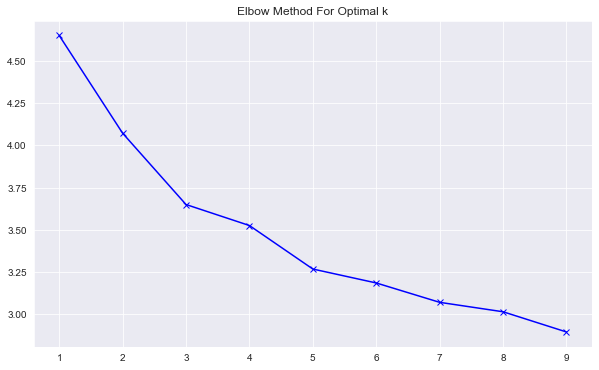

In [90]:
madrid_grouped_clustering = madrid_venues_grouped.drop('Neighbourhood', 1)
sum_of_squared_distances = []
K = range(1,10)

for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(madrid_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.title('Elbow Method For Optimal k')
plt.savefig('Elbow Method For Optimal k.png')

In [91]:
#---------------------------------------------------------------------------

In [92]:
# Clustering with K-Means

In [93]:
#---------------------------------------------------------------------------

In [94]:
# Clustering Neighborhoods in to 5 groups
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=100).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 3, 3, 4, 1, 2, 2, 1, 3, 1])

In [95]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

madrid_merged = neighbourhoods_df

# merge madrid_grouped with df_madrid to add latitude/longitude for each neighbourhood
madrid_merged = madrid_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

madrid_merged


,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PALACIO,40.41517,-3.71273,1,Church,Spanish Restaurant,Restaurant,Office,Historic Site,Monument / Landmark,Embassy / Consulate,Building,Market,Government Building
1,EMBAJADORES,40.40803,-3.70067,3,Bar,Spanish Restaurant,Tapas Restaurant,Pizza Place,Salon / Barbershop,Restaurant,Kebab Restaurant,Brewery,Theater,Coffee Shop
2,CORTES,40.41589,-3.69636,3,Spanish Restaurant,Japanese Restaurant,Hotel Bar,Hotel,Office,Capitol Building,Embassy / Consulate,Tapas Restaurant,Breakfast Spot,Restaurant
3,JUSTICIA,40.42479,-3.69308,2,Art Gallery,Office,Courthouse,Boutique,Post Office,Food,Restaurant,Embassy / Consulate,Women's Store,Building
4,UNIVERSIDAD,40.42565,-3.70726,1,Restaurant,Hostel,Breakfast Spot,Bookstore,Café,Bar,Falafel Restaurant,Sushi Restaurant,Burrito Place,Lounge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,ALAMEDA DE OSUNA,40.45818,-3.58953,1,Travel Agency,Bar,Bookstore,Bank,Grocery Store,Office,Dry Cleaner,Restaurant,Bakery,Gift Shop
127,AEROPUERTO,40.48337,-3.55949,4,Airport Gate,Airport Service,Optical Shop,Coworking Space,Building,Fast Food Restaurant,Sandwich Place,Office,Newsstand,Miscellaneous Shop
128,CASCO HISTÓRICO DE BARAJAS,40.47482,-3.57951,1,Spanish Restaurant,Restaurant,Plaza,Church,Bar,Medical Center,Pharmacy,Coffee Shop,Doctor's Office,Chinese Restaurant
129,TIMÓN,40.48568,-3.60472,3,Rental Car Location,Restaurant,Supermarket,Diner,Spanish Restaurant,Airport Terminal,BBQ Joint,Park,Duty-free Shop,Soccer Field


In [96]:
#---------------------------------------------------------------------------bº

In [97]:
kmeans.labels_

array([1, 3, 3, 4, 1, 2, 2, 1, 3, 1, 2, 3, 1, 1, 1, 0, 0, 3, 3, 2, 1, 1,
       1, 3, 3, 1, 1, 1, 2, 0, 2, 2, 1, 1, 3, 2, 3, 2, 1, 1, 2, 3, 1, 3,
       3, 0, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 1, 1, 1, 3, 2, 2, 3, 2, 3,
       3, 1, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 1, 2, 0, 3, 2, 3, 1, 3, 1, 2,
       2, 0, 3, 1, 0, 3, 2, 3, 1, 3, 3, 1, 1, 3, 1, 0, 3, 2, 0, 1, 2, 3,
       1, 2, 3, 0, 1, 3, 3, 1, 3, 3, 1, 0, 2, 3, 1, 2, 3, 3, 1, 1, 3])

In [98]:
madrid_merged.dtypes

Neighbourhood              object
Latitude                  float64
Longitude                 float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, area, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Neighbourhood'], madrid_merged['Cluster Labels']):
    label = folium.Popup(remove_accents(str(area)) + ' Cluster ' + str(cluster), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, area, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Neighbourhood'], madrid_merged['Cluster Labels']):
    label = folium.Popup(remove_accents(str(area)) + ' Cluster ' + str(cluster), parse_html=True)

    folium.Marker(
        [lat, lon],
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [100]:
#!pip install fontawesome
import fontawesome as fa

In [103]:
map_2 = Map(location=[40.4167047, -3.7035825], zoom_start=12)

In [115]:

for i,row in madrid_merged.iterrows():
    barrio = {"location": [row["Latitude"], row["Longitude"]], "tooltip": row["Neighbourhood"]}

    if row["Cluster Labels"] == 0:
        icono = Icon(color = "red",
                     prefix="fa",
                     icon="home",
                     icon_color="black"
        )
    elif row["Cluster Labels"] == 1:
        icono = Icon(color = "black",
                     prefix="fa",
                     icon="laptop",
                     icon_color="White")

    elif row["Cluster Labels"] == 2:
        icono = Icon(color = "beige",
                     prefix="fa",
                     icon="building",
                     icon_color="black")

    elif row["Cluster Labels"] == 3:
        icono = Icon(color = "purple",
                     prefix="fa",
                     icon="glass",
                     icon_color="black")

    elif row["Cluster Labels"] == 4:
        icono = Icon(color = "blue",
                     prefix="fa",
                     icon="plane",
                     icon_color="black")

    else :
        icono = Icon(color = "red",
                     prefix="fa",
                     icon="car",
                     icon_color="black")
    mark = Marker(**barrio, icon=icono)
    mark.add_to(map_2)
map_2

import io
from PIL import Image
import selenium

img_data = map_clusters._to_png()
img = Image.open(io.BytesIO(img_data))
img.save('map_clusters_final.png')

In [121]:
save_map = map_2.save('map_clusters_final.html')

In [96]:
#---------------------------------------------------------------------------
madrid_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PALACIO,40.41517,-3.71273,2,Church,Restaurant,Spanish Restaurant,Mexican Restaurant,Historic Site,Monument / Landmark,Racetrack,Bus Station,Government Building,Beer Bar
1,EMBAJADORES,40.40803,-3.70067,1,Spanish Restaurant,Bar,Theater,Tapas Restaurant,Pizza Place,Restaurant,Salon / Barbershop,Coffee Shop,Indian Restaurant,African Restaurant
2,CORTES,40.41589,-3.69636,1,Spanish Restaurant,Hotel Bar,Hotel,Event Space,Embassy / Consulate,Japanese Restaurant,Office,Breakfast Spot,Capitol Building,Restaurant
3,JUSTICIA,40.42479,-3.69308,3,Art Gallery,Office,Courthouse,Boutique,Post Office,Women's Store,Restaurant,Food,Building,Embassy / Consulate
4,UNIVERSIDAD,40.42565,-3.70726,2,Restaurant,Bookstore,Café,Breakfast Spot,Bar,Hostel,Portuguese Restaurant,Mediterranean Restaurant,Lounge,Grocery Store


In [97]:
# Exploration of the clusters

In [116]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,ATOCHA,Office,Coworking Space,Train Station,Building,Bank,Sushi Restaurant,Restaurant,Café,Spanish Restaurant,General College & University
29,NUEVA ESPAÑA,Office,Embassy / Consulate,Dentist's Office,Deli / Bodega,Coworking Space,University,College Residence Hall,Student Center,General College & University,Rental Car Location
30,CASTILLA,Office,Coworking Space,Gas Station,Spanish Restaurant,School,Post Office,Building,Burger Joint,Spiritual Center,Smoke Shop
44,FUENTELARREINA,Office,Building,Bank,General College & University,Tech Startup,Community Center,Golf Course,Bakery,Tapas Restaurant,TV Station
45,PEÑAGRANDE,Office,Building,Gas Station,Coworking Space,Medical Center,Dentist's Office,Grocery Store,Auto Garage,Restaurant,Toy / Game Store
55,VALDEMARÍN,Office,Coworking Space,School,Medical Center,Tech Startup,College Academic Building,Tennis Court,Medical School,Mediterranean Restaurant,Meeting Room
56,EL PLANTÍO,Office,Coworking Space,Doctor's Office,Design Studio,Gas Station,Japanese Restaurant,Breakfast Spot,Nail Salon,Campaign Office,Tech Startup
82,PALOMERAS SURESTE,Office,Tech Startup,Gas Station,Dentist's Office,Medical Center,Grocery Store,College Classroom,Doctor's Office,Auto Dealership,Rest Area
98,ATALAYA,Office,Tech Startup,Spanish Restaurant,Building,General Entertainment,Other Great Outdoors,Salon / Barbershop,Bank,Church,Chinese Restaurant
107,SAN CRISTÓBAL,Office,Coworking Space,Military Base,School,Campaign Office,Bank,Automotive Shop,Restaurant,Baseball Stadium,Medical Center


In [117]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 1, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PALACIO,Church,Spanish Restaurant,Restaurant,Office,Historic Site,Monument / Landmark,Embassy / Consulate,Building,Market,Government Building
4,UNIVERSIDAD,Restaurant,Hostel,Breakfast Spot,Bookstore,Café,Bar,Falafel Restaurant,Sushi Restaurant,Burrito Place,Lounge
5,SOL,Clothing Store,Tapas Restaurant,Restaurant,Jewelry Store,Peruvian Restaurant,Accessories Store,Hotel,Plaza,Tanning Salon,Mexican Restaurant
19,RECOLETOS,Boutique,Clothing Store,Cosmetics Shop,Office,Bar,Japanese Restaurant,Jewelry Store,Mobile Phone Shop,Student Center,Parking
28,HISPANOAMÉRICA,Bank,Restaurant,Grocery Store,Furniture / Home Store,Doctor's Office,Bar,Pharmacy,Gym,Café,Smoke Shop
32,CUATRO CAMINOS,Office,Bank,Dentist's Office,Tapas Restaurant,Bakery,Japanese Restaurant,Park,Dog Run,Bar,Salon / Barbershop
42,VALLEHERMOSO,Restaurant,Pizza Place,Bank,Hospital,Office,School,Café,College Residence Hall,Spanish Restaurant,College Gym
49,MIRASIERRA,Supermarket,Medical Center,Doctor's Office,General College & University,Fast Food Restaurant,Hospital,Pharmacy,Gas Station,Scenic Lookout,Salon / Barbershop
50,EL GOLOSO,College Library,College Academic Building,College Cafeteria,University,College Administrative Building,College Classroom,Restaurant,College Science Building,Paper / Office Supplies Store,Hospital
52,ARGÜELLES,Restaurant,Dentist's Office,Bank,Convenience Store,Italian Restaurant,Salon / Barbershop,Shoe Store,Grocery Store,Deli / Bodega,Bike Shop


In [118]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 2, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,JUSTICIA,Art Gallery,Office,Courthouse,Boutique,Post Office,Food,Restaurant,Embassy / Consulate,Women's Store,Building
6,IMPERIAL,Office,Laundry Service,Tech Startup,Spanish Restaurant,Bakery,Bar,Gym / Fitness Center,Trade School,Automotive Shop,Grocery Store
9,LEGAZPI,Office,Supermarket,Bus Line,Spanish Restaurant,Pizza Place,Pharmacy,Organic Grocery,Automotive Shop,Rental Car Location,Residential Building (Apartment / Condo)
10,DELICIAS,Office,Gym / Fitness Center,Restaurant,School,General College & University,Trade School,Gym,Automotive Shop,Market,Bar
17,LOS JERÓNIMOS,Office,Café,Art Gallery,Restaurant,Museum,Italian Restaurant,College Academic Building,Coffee Shop,Bakery,Medical Lab
18,NIÑO JESÚS,Office,Spanish Restaurant,Restaurant,Doctor's Office,Asian Restaurant,Government Building,Bar,Dentist's Office,College Arts Building,Food & Drink Shop
24,CASTELLANA,Office,Building,Bank,Cosmetics Shop,Salon / Barbershop,Coffee Shop,Café,Bar,Coworking Space,Indian Restaurant
27,CIUDAD JARDÍN,Office,Tech Startup,Japanese Restaurant,Real Estate Office,Restaurant,Supermarket,Bakery,Tapas Restaurant,Bus Stop,Other Great Outdoors
33,CASTILLEJOS,Office,Bank,Gym,Italian Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Spanish Restaurant,Hotel,Asian Restaurant
34,ALMENARA,Office,Restaurant,Coworking Space,Government Building,Post Office,Building,Bank,Smoke Shop,Salon / Barbershop,Chinese Restaurant


In [119]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 3, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,EMBAJADORES,Bar,Spanish Restaurant,Tapas Restaurant,Pizza Place,Salon / Barbershop,Restaurant,Kebab Restaurant,Brewery,Theater,Coffee Shop
2,CORTES,Spanish Restaurant,Japanese Restaurant,Hotel Bar,Hotel,Office,Capitol Building,Embassy / Consulate,Tapas Restaurant,Breakfast Spot,Restaurant
7,ACACIAS,Park,Pizza Place,Tapas Restaurant,Café,General College & University,Non-Profit,Salon / Barbershop,Bar,Mobile Phone Shop,Fruit & Vegetable Store
8,LA CHOPERA,Tapas Restaurant,Plaza,Wine Bar,Spanish Restaurant,Café,Bar,Coworking Space,Italian Restaurant,Park,Frozen Yogurt Shop
11,PALOS DE MOGUER,Bar,Spanish Restaurant,Bank,Grocery Store,Furniture / Home Store,Coffee Shop,Mattress Store,General Entertainment,Record Shop,Escape Room
13,PACÍFICO,Bar,Diner,Bank,Café,Government Building,Office,Gas Station,Tapas Restaurant,Salon / Barbershop,Grocery Store
14,ADELFAS,Bank,Bar,Metro Station,Bakery,Office,Gym,Coffee Shop,Café,Spanish Restaurant,Medical Lab
15,LA ESTRELLA,Bar,Bank,Spanish Restaurant,Office,Dentist's Office,Gym,General College & University,Doctor's Office,School,Tapas Restaurant
16,IBIZA,Tapas Restaurant,Salon / Barbershop,Bakery,Bar,Bank,Empanada Restaurant,Brewery,Pharmacy,Pizza Place,Seafood Restaurant
20,GOYA,Bar,Cosmetics Shop,Coffee Shop,Gift Shop,Tapas Restaurant,Miscellaneous Shop,Bus Line,Shoe Store,Bank,Pharmacy


In [120]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 4, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
127,AEROPUERTO,Airport Gate,Airport Service,Optical Shop,Coworking Space,Building,Fast Food Restaurant,Sandwich Place,Office,Newsstand,Miscellaneous Shop


In [103]:
#---------------------------------------------------------------------------

In [104]:
# From now on, we will work only with the cluster 0 , since is the one with Most venues in Restaurants,bars,cafes,coffeeshops,desserts,icecream,liquor,pubs,restaurants,spas,tea,wines

In [99]:
#---------------------------------------------------------------------------
# Extracting the data from the clusters

In [125]:
leisure_cluster= 3
df_madrid_leisure_3 = neighbourhoods_df[neighbourhoods_df['Neighbourhood'].isin(madrid_merged.loc[madrid_merged['Cluster Labels'] == leisure_cluster, 'Neighbourhood'].tolist())]

In [126]:
df_madrid_leisure_3

,Neighbourhood,Latitude,Longitude
1,EMBAJADORES,40.40803,-3.70067
2,CORTES,40.41589,-3.69636
7,ACACIAS,40.40137,-3.70669
8,LA CHOPERA,40.39536,-3.69833
11,PALOS DE MOGUER,40.40301,-3.69358
13,PACÍFICO,40.40191,-3.67603
14,ADELFAS,40.40173,-3.67288
15,LA ESTRELLA,40.41117,-3.66593
16,IBIZA,40.41794,-3.67626
20,GOYA,40.42547,-3.67418


In [127]:
#---------------------------------------------------------------------------

In [128]:
# Finding the most popular venues in the cluster
#Repo for api foursquare ID's
#https://gist.github.com/mraaroncruz/0a9e4968f7149821ca74

#Wine Shop id = 4bf58dd8d48988d119951735
#Liquor Store id =4bf58dd8d48988d186941735

In [129]:
CLIENT_ID = tok1 # Foursquare ID
CLIENT_SECRET = tok2 # Foursquare Secret
ACCESS_TOKEN = '' # FourSquare Access Token
VERSION = '20180323' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Credentails:')
print('CLIENT_ID: ' + tok1)
print('CLIENT_SECRET:' + tok2)

Credentails:
CLIENT_ID: RRLQJ3E2XUVOIOJ1JCCTVG5T2TW5EUVL35NBIEAJGO5UHUH2
CLIENT_SECRET:IZUZ45XFYXTK0NNIBHIF412VCEOZGOMSLUN5CWOT50IERA5S


In [130]:
# Category ID in Foursquare API

Wine_Bar_id=  '4bf58dd8d48988d123941735'

# Function to count the number of market-like venues in a given neighbourhood
def getwine(row):

    # create the API request URL
    url2 = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        row['Latitude'],
        row['Longitude'],
        Wine_Bar_id,
        radius,
        LIMIT)

    # make the GET request and get get length of venues
    results2 = requests.get(url2).json()["response"]['venues']
    count = len(results2)


    # return count
    return count

In [131]:
getwine(df_madrid_leisure_3.iloc[0])

50

In [132]:
df_madrid_leisure_3['Wine Bar Count'] = df_madrid_leisure_3.apply(getwine, axis=1)

C:\Users\PLATER~1\AppData\Local\Temp/ipykernel_20432/2324127042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_madrid_leisure_3['Wine Bar Count'] = df_madrid_leisure_3.apply(getwine, axis=1)


In [133]:
df_madrid_leisure_3

,Neighbourhood,Latitude,Longitude,Wine Bar Count
1,EMBAJADORES,40.40803,-3.70067,50
2,CORTES,40.41589,-3.69636,48
7,ACACIAS,40.40137,-3.70669,43
8,LA CHOPERA,40.39536,-3.69833,18
11,PALOS DE MOGUER,40.40301,-3.69358,27
13,PACÍFICO,40.40191,-3.67603,6
14,ADELFAS,40.40173,-3.67288,5
15,LA ESTRELLA,40.41117,-3.66593,6
16,IBIZA,40.41794,-3.67626,23
20,GOYA,40.42547,-3.67418,29


In [200]:
df_madrid_leisure_4['Wine Bar Count'].max()

0

In [115]:
#---------------------------------------------------------------------------
#Merging data from the clusters with the data from excels

In [116]:
#---------------------------------------------------------------------------

In [117]:
# Left join of df_madrid_income and df_madrid_leisure


In [134]:
df_madrid_leisure_3 = df_madrid_leisure_3.join(df_madrid_income.set_index('Neighbourhood'), on='Neighbourhood')
df_madrid_leisure_3

,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income
1,EMBAJADORES,40.40803,-3.70067,50,26761.0
2,CORTES,40.41589,-3.69636,48,37426.0
7,ACACIAS,40.40137,-3.70669,43,NaN
8,LA CHOPERA,40.39536,-3.69833,18,32349.0
11,PALOS DE MOGUER,40.40301,-3.69358,27,34649.0
13,PACÍFICO,40.40191,-3.67603,6,36935.0
14,ADELFAS,40.40173,-3.67288,5,46144.0
15,LA ESTRELLA,40.41117,-3.66593,6,59503.0
16,IBIZA,40.41794,-3.67626,23,46829.0
20,GOYA,40.42547,-3.67418,29,50739.0


In [119]:
df_madrid_leisure.dtypes

Neighbourhood      object
Latitude          float64
Longitude         float64
Wine Bar Count      int64
Income            float64
dtype: object

In [120]:
df_madrid_income.dtypes

Neighbourhood    object
Income            int32
dtype: object

In [121]:
df_madrid_population.dtypes

Neighbourhood     object
Age               object
Population       float64
dtype: object

In [202]:
#Changing Income to int
df_madrid_leisure_4= df_madrid_leisure_4.merge(df_madrid_population, how='left', on='Neighbourhood')
df_madrid_leisure_4

,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income,Age,Population
0,AEROPUERTO,40.48337,-3.55949,0,25366,35 - 39,159.0


In [203]:
#dropping the neighborhoods that in Income are less than 30000
df_madrid_leisure_4 = df_madrid_leisure_4[df_madrid_leisure_4['Income'] > 35000]
df_madrid_leisure_4

,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income,Age,Population


In [130]:
#---------------------------------------------------------------------------
# Finding the ideal Neighbourhood for the user, making a relationship between the number of Wine Bars and the number of people living in the neighbourhood

In [131]:
#---------------------------------------------------------------------------

In [187]:
# Creating a new column with the ratio of the number of people living in the neighbourhood and the number of Wine Bars
df_madrid_leisure_3['Ratio'] = df_madrid_leisure_3['Population']/df_madrid_leisure_3['Wine Bar Count']
df_madrid_leisure_3

C:\Users\PLATER~1\AppData\Local\Temp/ipykernel_18396/2924635518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_madrid_leisure_3['Ratio'] = df_madrid_leisure_3['Population']/df_madrid_leisure_3['Wine Bar Count']


,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income,Age,Population,Ratio
0,JUSTICIA,40.42479,-3.69308,44,41583.0,35 - 39,1697.0,38.568182
2,LOS JERÓNIMOS,40.41407,-3.69023,39,69543.0,35 - 39,418.0,10.717949
3,CASTELLANA,40.43494,-3.68319,27,72528.0,35 - 39,992.0,36.740741
4,CIUDAD JARDÍN,40.45046,-3.66771,8,44436.0,35 - 39,1433.0,179.125000
5,NUEVA ESPAÑA,40.46412,-3.67980,6,73422.0,35 - 39,1532.0,255.333333
6,CASTILLA,40.47131,-3.67600,2,56554.0,35 - 39,1236.0,618.000000
7,CASTILLEJOS,40.45946,-3.69482,11,46595.0,35 - 39,1737.0,157.909091
8,ALMAGRO,40.43296,-3.69153,42,69962.0,35 - 39,1333.0,31.738095
9,PEÑAGRANDE,40.47839,-3.72735,1,46484.0,NaN,NaN,NaN
10,EL PLANTÍO,40.46893,-3.82061,0,89015.0,35 - 39,166.0,inf


In [188]:
# saving df_madrid_leisure to a  new dataframe called df_madrid_leisure_cluster_1
df_madrid_leisure_cluster_3 = df_madrid_leisure_3

In [204]:

#df_madrid_leisure_cluster_0.to_csv('df_madrid_leisure_cluster_0.csv')
#df_madrid_leisure_cluster_1.to_csv('df_madrid_leisure_cluster_1.csv')
#df_madrid_leisure_cluster_2.to_csv('df_madrid_leisure_cluster_2.csv')
#df_madrid_leisure_cluster_3.to_csv('df_madrid_leisure_cluster_3.csv')
# Testing the visualization

In [205]:
# Merging the dataframes df_madrid_leisure_cluster_0, df_madrid_leisure_cluster_1, df_madrid_leisure_cluster_2, df_madrid_leisure_cluster_3
df_madrid_leisure_final = pd.concat([df_madrid_leisure_cluster_0, df_madrid_leisure_cluster_1, df_madrid_leisure_cluster_2, df_madrid_leisure_cluster_3])
df_madrid_leisure_final

,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income,Age,Population,Ratio
7,MARROQUINA,40.41176,-3.64618,1,40061.0,35 - 39,1256.0,1256.000000
11,SANTA EUGENIA,40.38121,-3.60972,0,36865.0,35 - 39,1464.0,inf
1,CORTES,40.41589,-3.69636,48,37426.0,35 - 39,1017.0,21.187500
2,IMPERIAL,40.40833,-3.71865,50,35479.0,35 - 39,1660.0,33.200000
5,PACÍFICO,40.40191,-3.67603,6,36935.0,35 - 39,2224.0,370.666667
...,...,...,...,...,...,...,...,...
9,PEÑAGRANDE,40.47839,-3.72735,1,46484.0,NaN,NaN,NaN
10,EL PLANTÍO,40.46893,-3.82061,0,89015.0,35 - 39,166.0,inf
11,ATALAYA,40.46457,-3.66335,1,71758.0,35 - 39,84.0,84.000000
13,REJAS,40.44629,-3.57489,0,38875.0,35 - 39,1335.0,inf


In [206]:
#---------------------------------------------------------------------------
# sorting the dataframe by the ratio, and giving just the top 10 with 2 decimal places
df_madrid_leisure_final = df_madrid_leisure_final.sort_values(by=['Ratio'], ascending=False).round(2)
df_madrid_leisure_final

,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income,Age,Population,Ratio
13,FUENTELARREINA,40.48,-3.74,0,79413.0,35 - 39,147.0,inf
46,VALDEBERNARDO,40.40,-3.62,0,39388.0,35 - 39,689.0,inf
11,SANTA EUGENIA,40.38,-3.61,0,36865.0,35 - 39,1464.0,inf
15,MIRASIERRA,40.49,-3.72,0,69353.0,35 - 39,2161.0,inf
16,EL GOLOSO,40.54,-3.70,0,60055.0,35 - 39,1303.0,inf
...,...,...,...,...,...,...,...,...
7,RECOLETOS,40.43,-3.69,43,79736.0,35 - 39,962.0,22.37
1,CORTES,40.42,-3.70,48,37426.0,35 - 39,1017.0,21.19
2,LOS JERÓNIMOS,40.41,-3.69,39,69543.0,35 - 39,418.0,10.72
5,ATOCHA,40.40,-3.68,17,38575.0,35 - 39,122.0,7.18


In [ ]:
bdf_madrid_leisure_final.to_csv('df_madrid_leisure_final.csv')

In [136]:
read_df_madrid_leisure_final = pd.read_csv('df_madrid_leisure_final.csv')
read_df_madrid_leisure_final

,Unnamed: 0,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income,Age,Population,Ratio
0,13,FUENTELARREINA,40.48,-3.74,0,79413.0,35 - 39,147.0,inf
1,46,VALDEBERNARDO,40.40,-3.62,0,39388.0,35 - 39,689.0,inf
2,11,SANTA EUGENIA,40.38,-3.61,0,36865.0,35 - 39,1464.0,inf
3,15,MIRASIERRA,40.49,-3.72,0,69353.0,35 - 39,2161.0,inf
4,16,EL GOLOSO,40.54,-3.70,0,60055.0,35 - 39,1303.0,inf
...,...,...,...,...,...,...,...,...,...
64,7,RECOLETOS,40.43,-3.69,43,79736.0,35 - 39,962.0,22.37
65,1,CORTES,40.42,-3.70,48,37426.0,35 - 39,1017.0,21.19
66,2,LOS JERÓNIMOS,40.41,-3.69,39,69543.0,35 - 39,418.0,10.72
67,5,ATOCHA,40.40,-3.68,17,38575.0,35 - 39,122.0,7.18


In [141]:
powerup= read_df_madrid_leisure_final[read_df_madrid_leisure_final['Income'] > 40000]
powerup

,Unnamed: 0,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income,Age,Population,Ratio
0,13,FUENTELARREINA,40.48,-3.74,0,79413.0,35 - 39,147.0,inf
3,15,MIRASIERRA,40.49,-3.72,0,69353.0,35 - 39,2161.0,inf
4,16,EL GOLOSO,40.54,-3.70,0,60055.0,35 - 39,1303.0,inf
5,19,CIUDAD UNIVERSITARIA,40.45,-3.73,0,61443.0,35 - 39,978.0,inf
6,20,VALDEMARÍN,40.47,-3.78,0,88034.0,35 - 39,379.0,inf
7,21,ARAVACA,40.46,-3.78,0,68119.0,35 - 39,1391.0,inf
9,30,HORCAJO,40.41,-3.63,0,45263.0,35 - 39,241.0,inf
10,33,SAN JUAN BAUTISTA,40.45,-3.66,0,57428.0,35 - 39,730.0,inf
11,34,COLINA,40.46,-3.66,0,53788.0,35 - 39,387.0,inf
12,36,PALOMAS,40.45,-3.62,0,82127.0,35 - 39,318.0,inf


In [143]:
powerup = powerup[powerup['Ratio'] > 100]
powerup

,Unnamed: 0,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income,Age,Population,Ratio
0,13,FUENTELARREINA,40.48,-3.74,0,79413.0,35 - 39,147.0,inf
3,15,MIRASIERRA,40.49,-3.72,0,69353.0,35 - 39,2161.0,inf
4,16,EL GOLOSO,40.54,-3.70,0,60055.0,35 - 39,1303.0,inf
5,19,CIUDAD UNIVERSITARIA,40.45,-3.73,0,61443.0,35 - 39,978.0,inf
6,20,VALDEMARÍN,40.47,-3.78,0,88034.0,35 - 39,379.0,inf
7,21,ARAVACA,40.46,-3.78,0,68119.0,35 - 39,1391.0,inf
9,30,HORCAJO,40.41,-3.63,0,45263.0,35 - 39,241.0,inf
10,33,SAN JUAN BAUTISTA,40.45,-3.66,0,57428.0,35 - 39,730.0,inf
11,34,COLINA,40.46,-3.66,0,53788.0,35 - 39,387.0,inf
12,36,PALOMAS,40.45,-3.62,0,82127.0,35 - 39,318.0,inf


In [144]:
# Removing inf values in the ratio
powerup = powerup[powerup['Ratio'] != np.inf]
powerup

,Unnamed: 0,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income,Age,Population,Ratio
21,39,VALDEFUENTES,40.49,-3.66,1,53809.0,35 - 39,5870.0,5870.00
22,14,VALVERDE,40.50,-3.69,1,43897.0,35 - 39,4730.0,4730.00
25,49,ROSAS,40.43,-3.60,1,44105.0,35 - 39,1302.0,1302.00
26,7,MARROQUINA,40.41,-3.65,1,40061.0,35 - 39,1256.0,1256.00
27,35,COSTILLARES,40.48,-3.67,1,66647.0,35 - 39,1104.0,1104.00
29,17,CASA DE CAMPO,40.41,-3.76,1,55237.0,35 - 39,868.0,868.00
30,37,PIOVERA,40.46,-3.64,1,81087.0,35 - 39,737.0,737.00
31,45,VALDERRIVAS,40.40,-3.60,1,40053.0,35 - 39,736.0,736.00
32,6,CASTILLA,40.47,-3.68,2,56554.0,35 - 39,1236.0,618.00
34,8,HISPANOAMÉRICA,40.46,-3.68,6,63487.0,35 - 39,2034.0,339.00


In [146]:
import dataframe_image as di
di.export(powerup, filename='Ganz_powerup.png',max_rows=24)

In [130]:
# Saving datafrmaes in to csv files
df_madrid_leisure.to_csv('df_madrid_leisure.csv')
df_madrid_income.to_csv('df_madrid_income.csv')
df_madrid_population.to_csv('df_madrid_population.csv')
madrid_venues.to_csv('madrid_venues.csv')
madrid_merged.to_csv('madrid_merged.csv')
neighbourhoods_df.to_csv('neighbourhoods_df.csv')